In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Develop data input

In [3]:
import h5py
import pandas as pd
h5_path = 'swgo/test.h5'
with h5py.File(h5_path, "r") as f:
    inputs_data = f["inputs"][:]   # (events, locations, 4)                   
    # keep for compatibility, but we dont need the labels here
    # labels_data = f["labels"][:]   # (events, 5)
inputs_concatenated = inputs_data.reshape(-1, inputs_data.shape[-1])  # (concat_events*locations, 4)

# save names for inputs and labels
input_names = ["x", "y", "N", "T"]
# labels_names = ["x0", "y0", "E", "theta", "phi"]

# convert to pandas dataframe
inputs = pd.DataFrame(inputs_concatenated, columns=input_names)
print("Data has been successfully loaded")
print(f"Shape: {inputs.shape}")



Data has been successfully loaded
Shape: (18000000, 4)


Text(0, 0.5, 'Y position')

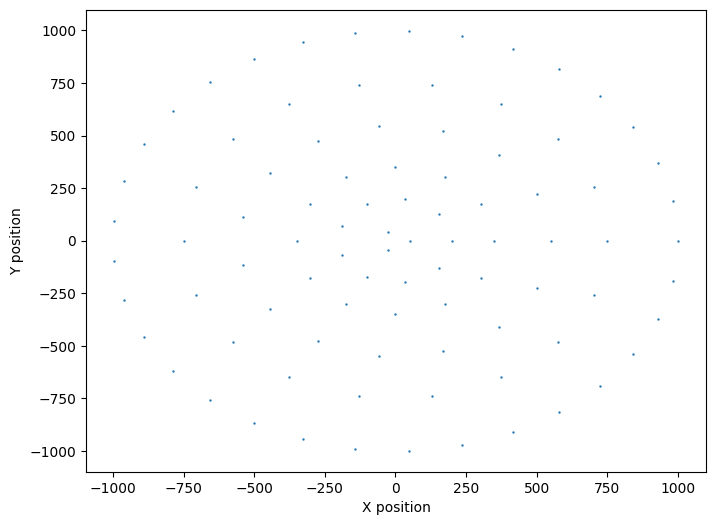

In [4]:
import matplotlib.pyplot as plt

variations_of_x_y = inputs.groupby(['x', 'y']).size().reset_index(name='counts')    
len(variations_of_x_y)
plt.figure(figsize=(8,6))
plt.scatter(variations_of_x_y['x'], variations_of_x_y['y'], s=0.5)
plt.xlabel('X position')
plt.ylabel('Y position')

In [5]:
# sum N for each T
input_times = inputs.groupby(['T']).agg({'N': 'sum'}).reset_index()

In [6]:
input_times.shape

(16488336, 2)

## Test data input

In [7]:
from simulator import Simulator

In [8]:
simulator = Simulator()

In [9]:
simulator.read_data('swgo/test.h5')

Loading data from swgo/test.h5...
Data has been successfully loaded
Shape: (18000000, 4)


## Test detector initialization

In [10]:
simulator.detector_radius=50
simulator.initialize_detectors()

Random initialization completed.


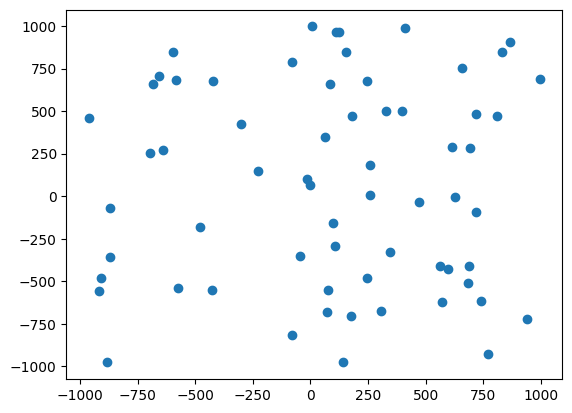

In [11]:
plt.scatter(simulator.detectors_loc[:, 0], simulator.detectors_loc[:, 1])

Uniform initialization completed.


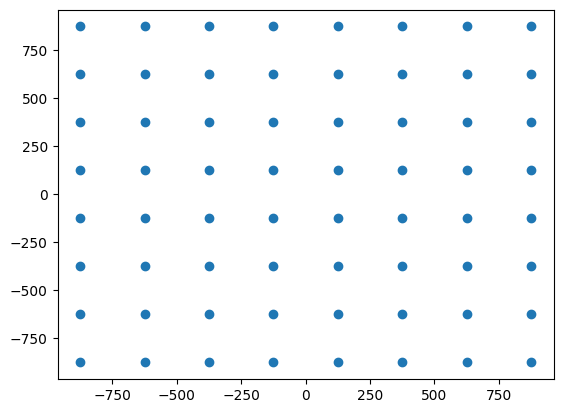

In [12]:
simulator.initialize_detectors(initialization_logic="uniform")
plt.figure()
plt.scatter(simulator.detectors_loc[:, 0], simulator.detectors_loc[:, 1])

## Particle detection

In [13]:
simulator.inputs = simulator.inputs.sample(frac=0.01)

In [14]:
simulator.inputs.shape

(180000, 4)

In [18]:
simulator.calculate_detected_particles()

Calculated detected particles for 179838 events


In [16]:
simulator.calculate_total_particles()

Calculated total particles for 179838 events


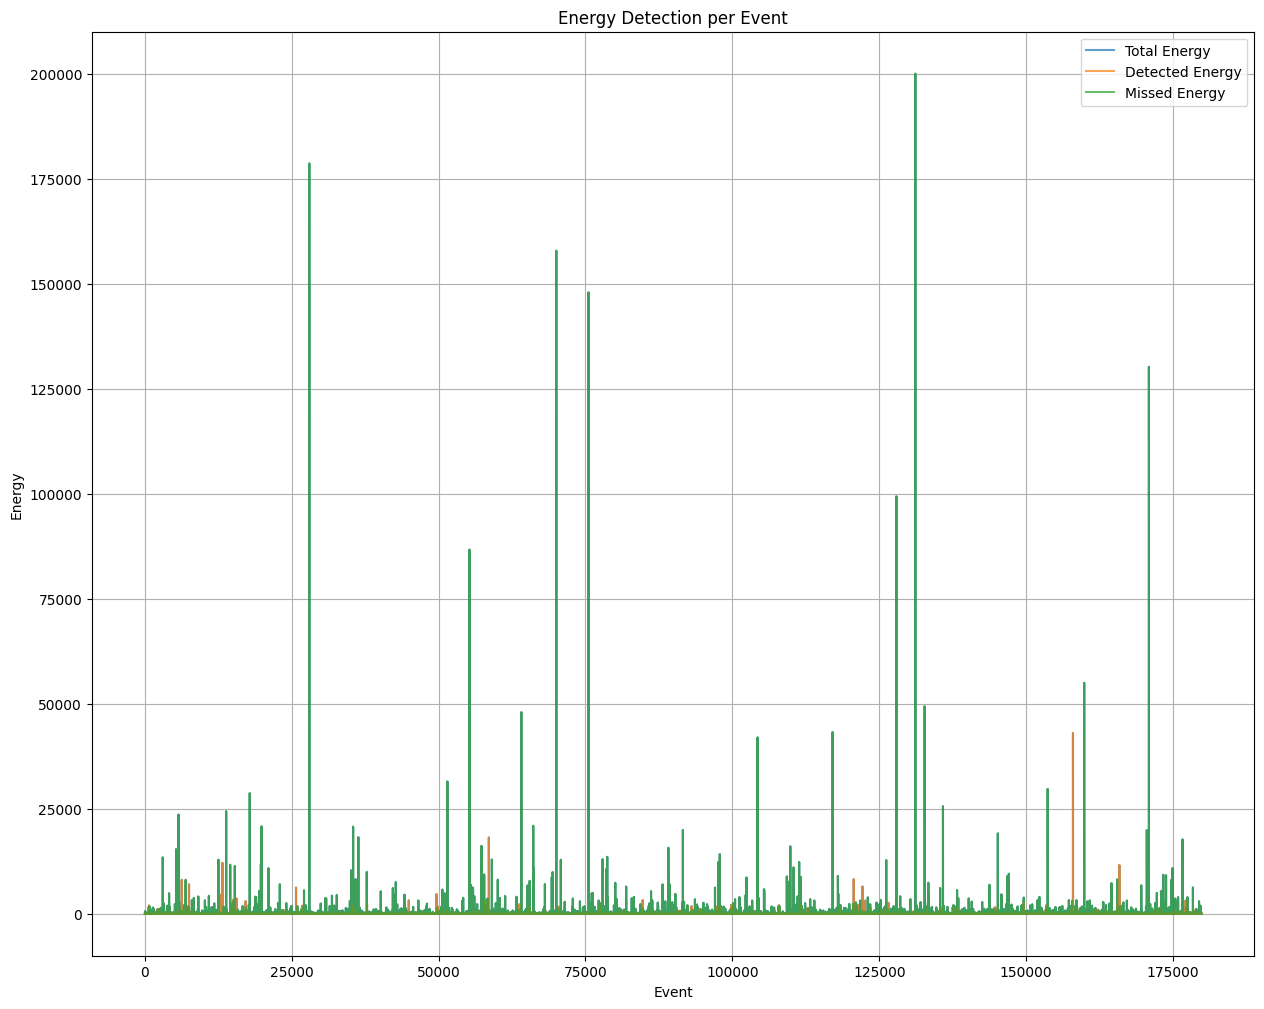

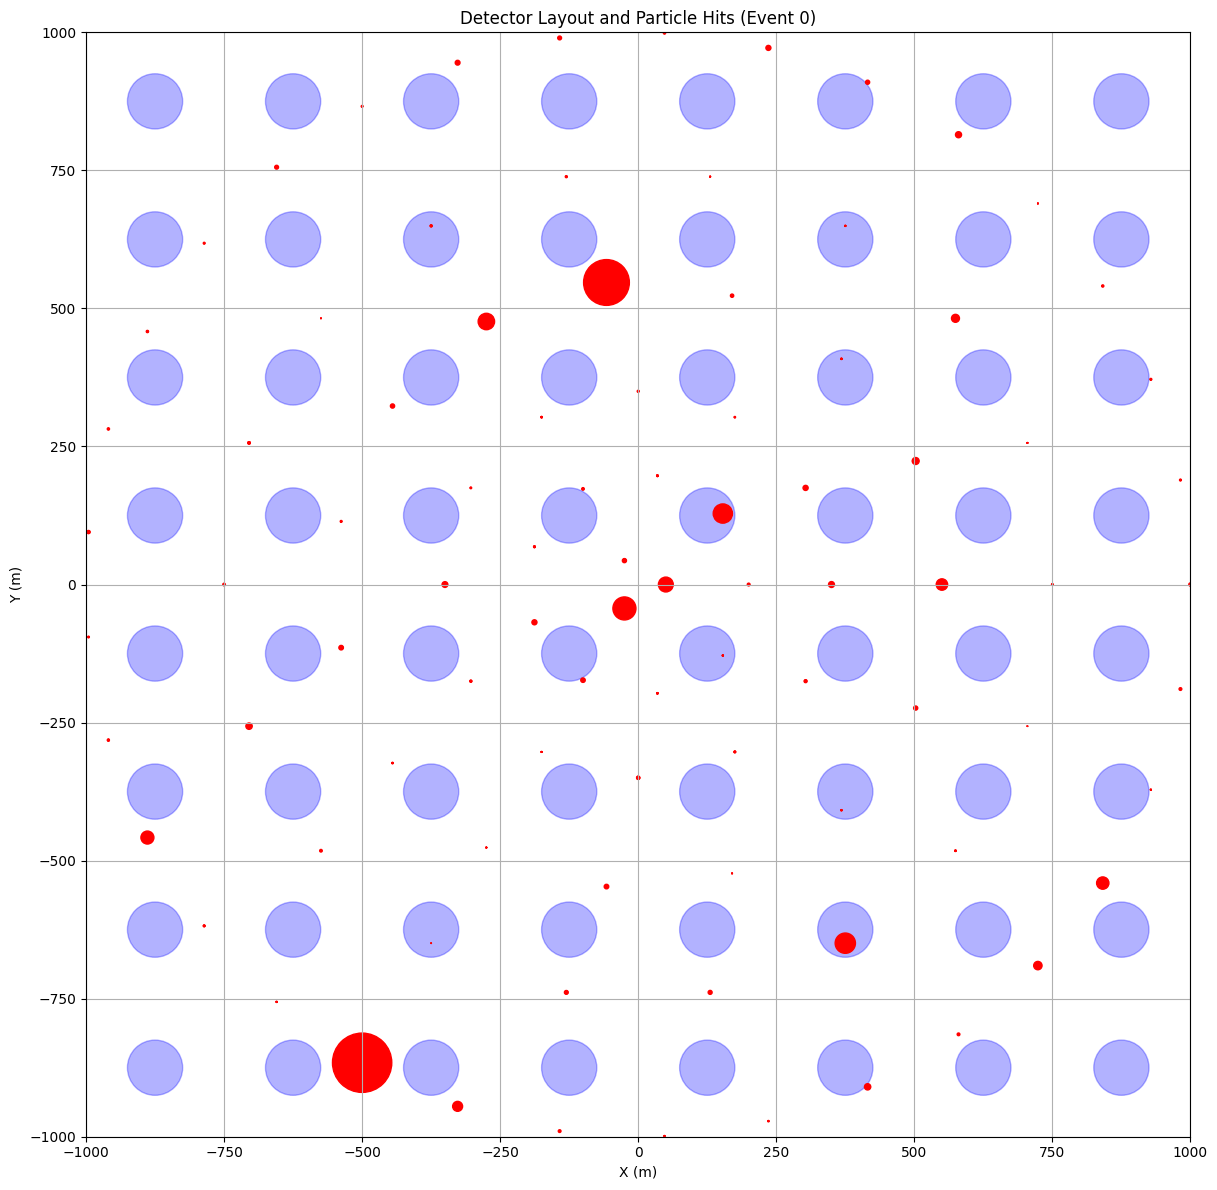


=== Energy Summary ===
Total Energy: 4595490.00
Detected Energy: 359973.06
Detection Efficiency: 7.83%


In [17]:
simulator.plot_energies()